In [1]:
import sys
from matplotlib import pyplot as plt


In [2]:
class rocket_sensor_data_log:
    def __init__(self, time, t_t1, t_t2, c_t1, c_t2, c_t3, t_p1, t_p2, t_p, t_l, t1, c_p):
        self.time = time

        self.t_t1 = t_t1
        self.t_t2 = t_t2

        self.c_t1 = c_t1
        self.c_t2 = c_t2
        self.c_t3 = c_t3

        self.t_p1 = t_p1
        self.t_p2 = t_p2

        self.t_p = t_p

        self.t_l = t_l

        self.t1 = t1

        self.c_p = c_p

sensor_data_arr = []

In [3]:
class fill_station_sensor_data_log:
    def __init__(self, time, t_p, t_l, t1, t2, t3, p1, p2, p3, ematch, weight, tactile):
        self.time = time

        self.t_p = t_p
        self.t_l = t_l

        self.t1 = t1
        self.t2 = t2
        self.t3 = t3

        self.p1 = p1
        self.p2 = p2
        self.p3 = p3

        self.ematch = ematch

        self.weight = weight

        self.tactile = tactile

fill_sensor_data_arr = []

In [4]:
SENSOR_READING = 0
MSG_RECEIVED = 1
MSG_SENT = 2
SYSTEM_ERROR = 3
STATE_CHANGE = 4
EVENT_REACTION = 5

In [5]:
buff = []
with open("logs/log_5_9_2024_17933.bin", 'rb') as f:
    buff.append(f.read())
buff = buff[0]

print(len(buff))
print(buff[0:100])

5322504
b"\x01\x00\x00\x0f\xaf\x00\x02$\x01\x00\xf1\x00\x94'\xfd'\xfd\x01\x18\x10\xe5\x10\xe4\x10\xe6'9\x00\x004\xff\xc0\xff\xfb\x00\x02\xff\xee\x00\x00\xff\xff\x00\x0e\x01\x00\x00\x0f\xbb\x00\x01\x16\x01\x10\xe6'9\x01\x0e\x01\x13\x00\xcf\x17\xf2\x17\x8c\x10\xf8\x00\x00\xff\xe8\x00\x01\x00\x00\x0f\xe2\x00\x02$\x01\x00\xf1\x00\x94'\xfd'\xfd\x01\x18\x10\xe5\x10\xe5\x10\xe5'"


In [6]:
#fill station
rocket_sensor_data_arr = []
fill_sensor_data_arr = []
c1 = 0
c2 = 0

index = 0
while index < len(buff):
    #print(index)
    if(buff[index] == MSG_RECEIVED):
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 
        cmd = int.from_bytes(buff[index + 5 : index + 6], byteorder='big', signed=True) 
        id = int.from_bytes(buff[index + 6 : index + 7], byteorder='big', signed=True) 
        size = int.from_bytes(buff[index + 7 : index + 8], byteorder='big', signed=False) 
        
        data = []
        for i in range(size):
            data.append(int.from_bytes(buff[index + 8 + i : index + 9 + i], byteorder='big', signed=False))
        
        if((cmd == 0 and id == 1) or (cmd == 14 and id == 2)): # change size according to filling payload size
            t_p = int.from_bytes(data[1 : 3], byteorder='big', signed=True)
            t_l = int.from_bytes(data[3 : 5], byteorder='big', signed=True)
            t1 = int.from_bytes(data[5 : 7], byteorder='big', signed=True) 
            t2 = int.from_bytes(data[7 : 9], byteorder='big', signed=True)
            t3 = int.from_bytes(data[9 : 11], byteorder='big', signed=True)
            p1 = int.from_bytes(data[11 : 13], byteorder='big', signed=True) 
            p2 = int.from_bytes(data[13 : 15], byteorder='big', signed=True)
            p3 = int.from_bytes(data[15 : 17], byteorder='big', signed=True)
            ematch = int.from_bytes(data[17 : 19], byteorder='big', signed=True)
            weight = int.from_bytes(data[19 : 21], byteorder='big', signed=True)
            tactile = int.from_bytes(buff[21 : 22], byteorder='big', signed=True)
            fill_sensor_data_arr.append(fill_station_sensor_data_log(time, t_p, t_l, t1, t2, t3, p1, p2, p3, ematch, weight, tactile))
            index += 26
            c1 += 1
        elif((cmd == 0 and id == 2) or (cmd == 14 and id == 1)): # change size according to rocket payload size
            t_t1 = int.from_bytes(data[1 : 3], byteorder='big', signed=True) 
            t_t2 = int.from_bytes(data[3 : 5], byteorder='big', signed=True)
            c_t1 = int.from_bytes(data[5 : 7], byteorder='big', signed=True)
            c_t2 = int.from_bytes(data[7 : 9], byteorder='big', signed=True)
            c_t3 = int.from_bytes(data[9 : 11], byteorder='big', signed=True)
            t_p1 = int.from_bytes(data[11 : 13], byteorder='big', signed=True)
            t_p2 = int.from_bytes(data[13 : 15], byteorder='big', signed=True)
            t_p = int.from_bytes(data[15 : 17], byteorder='big', signed=True)
            t_l = int.from_bytes(data[17 : 19], byteorder='big', signed=True)
            tactile = int.from_bytes(data[19 : 20], byteorder='big', signed=True)
            c_p = int.from_bytes(data[26 : 28], byteorder='big', signed=True)
            rocket_sensor_data_arr.append(rocket_sensor_data_log(time, t_t1, t_t2, c_t1, c_t2, c_t3, t_p1, t_p2, t_p, t_l, tactile, c_p))
            index += 40
            c2 += 1
        else: 
            index += size + 8
    else:
        index += 1

print(c1,c2)

63296 64930


4015
3936652
3937653


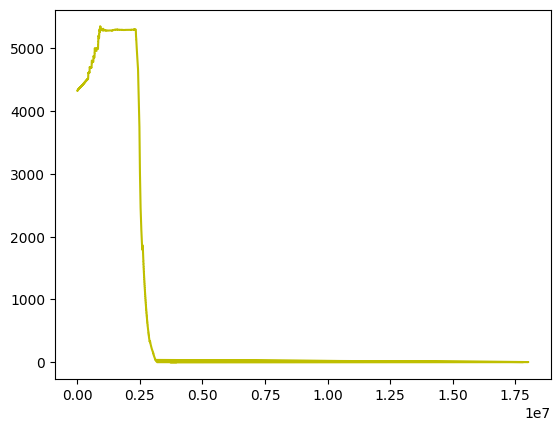

In [11]:
#make plots fill station temperature 

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in rocket_sensor_data_arr[:-1]]
#ax.plot(x, [log.p1 for log in fill_sensor_data_arr[:-1]], color='r')
#ax.plot(x, [log.p2 for log in fill_sensor_data_arr[:-1]], color='g')
#ax.plot(x, [log.p3 for log in fill_sensor_data_arr[:-1]], color='b')
ax.plot(x, [log.t_p1 for log in rocket_sensor_data_arr[:-1]], color='y')

print(x[0])
print(x[-1])
print(rocket_sensor_data_arr[-1].time)
plt.show()

4027
3929424
64546


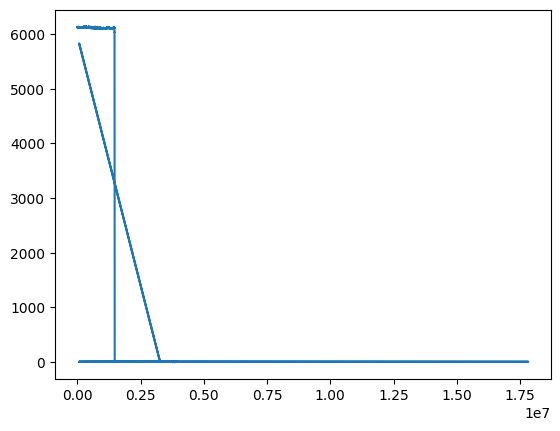

In [16]:

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in fill_sensor_data_arr[:-1]]
#ax.plot(x, [log.ematch for log in fill_sensor_data_arr[:-1]])
ax.plot(x, [log.p1 for log in fill_sensor_data_arr[:-1]])
#ax.plot(x, [log.p2 for log in fill_sensor_data_arr[:-1]])
#ax.plot(x, [log.p3 for log in fill_sensor_data_arr[:-1]])
#ax.plot(x, [log.t1 for log in fill_sensor_data_arr[:-1]])

#ax.vlines([log.time for log in msg_sent_arr], 0, 1000, colors='g')
print(x[0])
print(x[-1])
print(fill_sensor_data_arr[-1].time)
plt.show()

In [ ]:
#make plots rocket

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in sensor_data_arr]
ax.plot(x, [log.t_t1 / 10  for log in sensor_data_arr])
ax.plot(x, [log.t_t2 / 10 for log in sensor_data_arr])
#ax.plot(x, [log.c_t1 for log in sensor_data_arr])
#ax.plot(x, [log.c_t2 for log in sensor_data_arr])
#ax.plot(x, [log.c_t3 for log in sensor_data_arr])
#ax.plot(x, [log.c_p / 100 for log in sensor_data_arr])
ax.plot(x, [log.t_p1 / 100 for log in sensor_data_arr])
#ax.plot(x, [log.t_p2 / 100 for log in sensor_data_arr])

ax.vlines([log.time for log in state_change_arr if log.state == 8], 0, 60, colors='r')
ax.set_xlim(0.4 * 1e7, 0.5 * 1e7)
ax.vlines([log.time for log in state_change_arr if log.state == 7], 0, 60, colors='y')
ax.vlines([log.time for log in msg_sent_arr if log.cmd == 7], 0, 60, colors='b')
plt.show()

print([log.time for log in state_change_arr if log.state == 7])

arr = [log.time for log in state_change_arr if log.state == 7]

avg_b = 0
avg_t = 0
count = 0

for log in sensor_data_arr:
    if log.time >= arr[0] and log.time <= arr[1]:
        avg_t += log.t_p1
        avg_b += log.t_p2
        count += 1

avg_t = avg_t / count
avg_b = avg_b / count

print(avg_t / 100, avg_b / 100)
print(sensor_data_arr[0].t_t1)
print(sensor_data_arr[0].t_t2)